# EDA
## Vivienda en Madrid

In [77]:
#librerias estandar
from pathlib import Path
import sys
import os
import pandas as pd

pd.set_option('display.max_columns', None)
sys.path.append('..')

#modulos propios
from utils import funciones as f


In [78]:
data = pd.read_csv(r'..\data\raw\houses_Madrid.csv', index_col='Unnamed: 0')
data = data.sort_index(axis= 1)

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21742 entries, 0 to 21741
Data columns (total 57 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   are_pets_allowed              0 non-null      float64
 1   built_year                    10000 non-null  float64
 2   buy_price                     21742 non-null  int64  
 3   buy_price_by_area             21742 non-null  int64  
 4   door                          0 non-null      float64
 5   energy_certificate            21742 non-null  object 
 6   floor                         19135 non-null  object 
 7   has_ac                        11211 non-null  object 
 8   has_balcony                   3321 non-null   object 
 9   has_central_heating           13608 non-null  object 
 10  has_fitted_wardrobes          13399 non-null  object 
 11  has_garden                    1556 non-null   object 
 12  has_green_zones               4057 non-null   object 
 13  has_in

In [80]:
data.describe(include = 'all').round()

are_pets_allowed  built_year  buy_price  buy_price_by_area  door  \
count                0.0     10000.0    21742.0            21742.0   0.0   
unique               NaN         NaN        NaN                NaN   NaN   
top                  NaN         NaN        NaN                NaN   NaN   
freq                 NaN         NaN        NaN                NaN   NaN   
mean                 NaN      1970.0   653736.0             4021.0   NaN   
std                  NaN        69.0   782082.0             1908.0   NaN   
min                  NaN      1723.0    36000.0              447.0   NaN   
25%                  NaN      1957.0   198000.0             2551.0   NaN   
50%                  NaN      1970.0   375000.0             3720.0   NaN   
75%                  NaN      1994.0   763600.0             5000.0   NaN   
max                  NaN      8170.0  8800000.0            18889.0   NaN   

       energy_certificate  floor has_ac has_balcony has_central_heating  \
count               21742  19135  11211        3321               13608   
unique                 10     19      1           1                   2   
top            en trámite      1   True        True               False   
freq                10937   4440  11211        3321                9516   
mean                  NaN    NaN    NaN         NaN                 NaN   
std                   NaN    NaN    NaN         NaN                 NaN   
min                   NaN    NaN    NaN         NaN                 NaN   
25%                   NaN    NaN    NaN         NaN                 NaN   
50%                   NaN    NaN    NaN         NaN                 NaN   
75%                   NaN    NaN    NaN         NaN                 NaN   
max                   NaN    NaN    NaN         NaN                 NaN   

       has_fitted_wardrobes has_garden has_green_zones has_individual_heating  \
count                 13399       1556            4057                  13608   
unique                    1          1               1                      2   
top                    True       True            True                   True   
freq                  13399       1556            4057                   9516   
mean                    NaN        NaN             NaN                    NaN   
std                     NaN        NaN             NaN                    NaN   
min                     NaN        NaN             NaN                    NaN   
25%                     NaN        NaN             NaN                    NaN   
50%                     NaN        NaN             NaN                    NaN   
75%                     NaN        NaN             NaN                    NaN   
max                     NaN        NaN             NaN                    NaN   

       has_lift has_parking has_pool  has_private_parking  has_public_parking  \
count     19356       21742     5171                  0.0                 0.0   
unique        2           2        1                  NaN                 NaN   
top        True       False     True                  NaN                 NaN   
freq      14895       14023     5171                  NaN                 NaN   
mean        NaN         NaN      NaN                  NaN                 NaN   
std         NaN         NaN      NaN                  NaN                 NaN   
min         NaN         NaN      NaN                  NaN                 NaN   
25%         NaN         NaN      NaN                  NaN                 NaN   
50%         NaN         NaN      NaN                  NaN                 NaN   
75%         NaN         NaN      NaN                  NaN                 NaN   
max         NaN         NaN      NaN                  NaN                 NaN   

       has_storage_room has_terrace       house_type_id       id  \
count              7698        9548               21351  21742.0   
unique                1           1                   4      NaN   
top                True        True  HouseTy

In [81]:
df = f.nombre_columnas(data)

In [82]:
f.cardinalidad(df)

variable tipo_dato  cantidad_de_nulos  \
0    annio_construccion   float64              11742   
1          precio_venta     int64                  0   
2   precio_venta_por_m2     int64                  0   
3                   cee    object                  0   
4                  piso    object               2607   
5                balcon    object              18421   
6   armarios_empotrados    object               8343   
7                jardin    object              20186   
8          zonas_verdes    object              17685   
9       estacionamiento      bool                  0   
10               pileta    object              16571   
11             trastero    object              14044   
12              terraza    object              12194   
13        tipo_inmueble    object                391   
14            accesible    object              17668   
15             exterior    object               3043   
16                 bajo    object               1170   
17     necesita_reforma      bool                  0   
18               bannos   float64                 16   
19         habitaciones     int64                  0   
20     metros_cuadrados   float64                126   
21            ubicacion    object                  0   

                                       valores_unicos  cardinalidad  \
0   [1960.0, nan, 1955.0, 2003.0, 1981.0, 1950.0, ...           155   
1   [85000, 129900, 144247, 109900, 260000, 195000...          2403   
2   [1328, 1856, 1535, 1717, 2407, 1548, 1583, 158...          5643   
3   [D, en trámite, no indicado, F, E, inmueble ex...            10   
4   [3, 4, 1, Bajo, 2, nan, 7, 6, Semi-sótano, 5, ...            19   
5                                         [nan, True]             1   
6                                         [nan, True]             1   
7                                         [nan, True]             1   
8                                         [nan, True]             1   
9                                       [False, True]             2   
10                                        [nan, True]             1   
11                                        [nan, True]             1   
12                                        [nan, True]             1   
13  [HouseType 1: Pisos, HouseType 4: Dúplex, nan,...             4   
14                                        [nan, True]             1   
15                                 [True, nan, False]             2   
16                                 [False, True, nan]             2   
17                                      [False, True]             2   
18  [1.0, 2.0, 3.0, 4.0, 6.0, nan, 5.0, 14.0, 7.0,...            16   
19  [2, 3, 4, 5, 1, 0, 8, 6, 9, 7, 12, 10, 11, 16,...            19   
20  [64.0, 70.0, 94.0, 108.0, 126.0, 120.0, 125.0,...           678   
21  [San Cristóbal, Madrid, Los Ángeles, Madrid, S...           146   

    porcentaje_cardinalidad  
0                  0.712906  
1                 11.052341  
2                 25.954374  
3                  0.045994  
4                  0.087388  
5                  0.004599  
6                  0.004599  
7                  0.004599  
8                  0.004599  
9                  0.009199  
10                 0.004599  
11                 0.004599  
12                 0.004599  
13                 0.018398  
14                 0.004599  
15                 0.009199  
16                 0.009199  
17                 0.009199  
18                 0.073590  
19                 0.087388  
20                 3.118388  
21                 0.671511

## Analisis Univariante

##### Variables Cuantitativas

In [83]:
df_cuant = df.select_dtypes(include = 'number')
df_cuant.describe().round()

annio_construccion  precio_venta  precio_venta_por_m2   bannos  \
count             10000.0       21742.0              21742.0  21726.0   
mean               1970.0      653736.0               4021.0      2.0   
std                  69.0      782082.0               1908.0      1.0   
min                1723.0       36000.0                447.0      1.0   
25%                1957.0      198000.0               2551.0      1.0   
50%                1970.0      375000.0               3720.0      2.0   
75%                1994.0      763600.0               5000.0      2.0   
max                8170.0     8800000.0              18889.0     16.0   

       habitaciones  metros_cuadrados  
count       21742.0           21616.0  
mean            3.0             147.0  
std             2.0             134.0  
min             0.0              13.0  
25%             2.0              70.0  
50%             3.0             100.0  
75%             4.0             162.0  
max            24.0             999.0

------------------------------------------------------------
VARIABLE: annio_construccion



d:\Documentos\2.CURSOS\BOOTCAMP\privado\Proyecto_ML\src\notebooks\..\utils\funciones.py:75: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




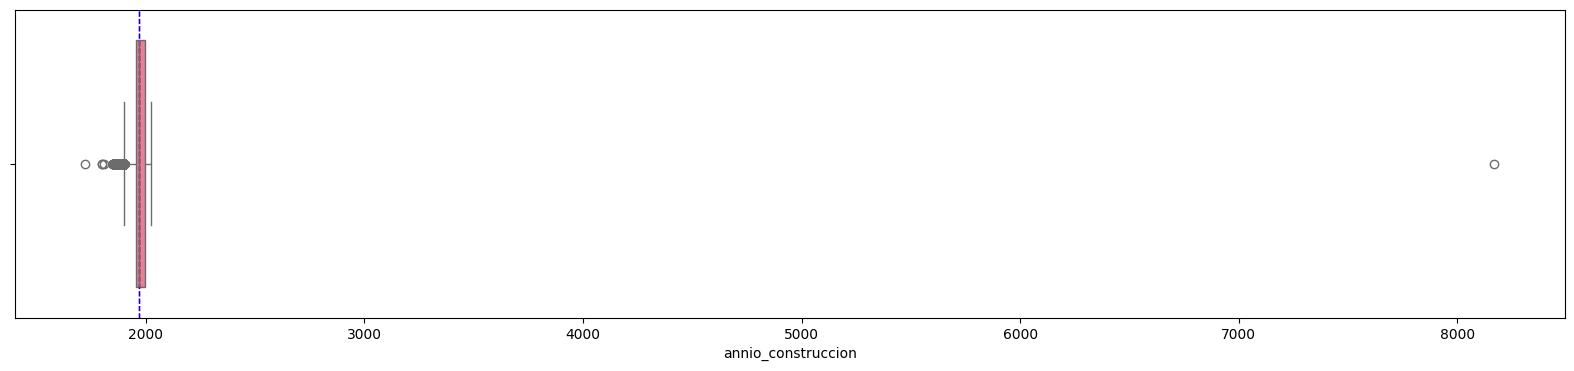

d:\Documentos\2.CURSOS\BOOTCAMP\privado\Proyecto_ML\src\notebooks\..\utils\funciones.py:81: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



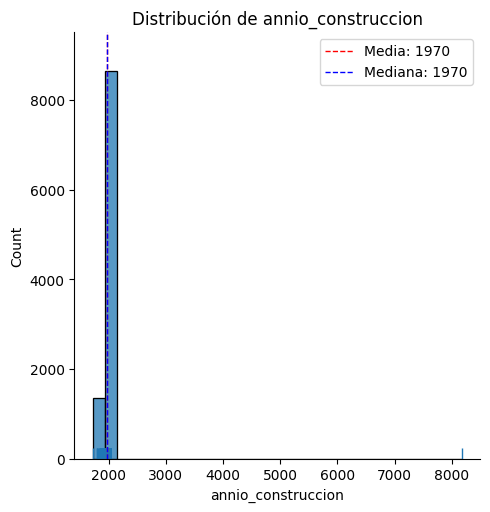

count    10000.0
mean      1970.0
std         69.0
min       1723.0
25%       1957.0
50%       1970.0
75%       1994.0
max       8170.0
Name: annio_construccion, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: precio_venta



d:\Documentos\2.CURSOS\BOOTCAMP\privado\Proyecto_ML\src\notebooks\..\utils\funciones.py:75: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




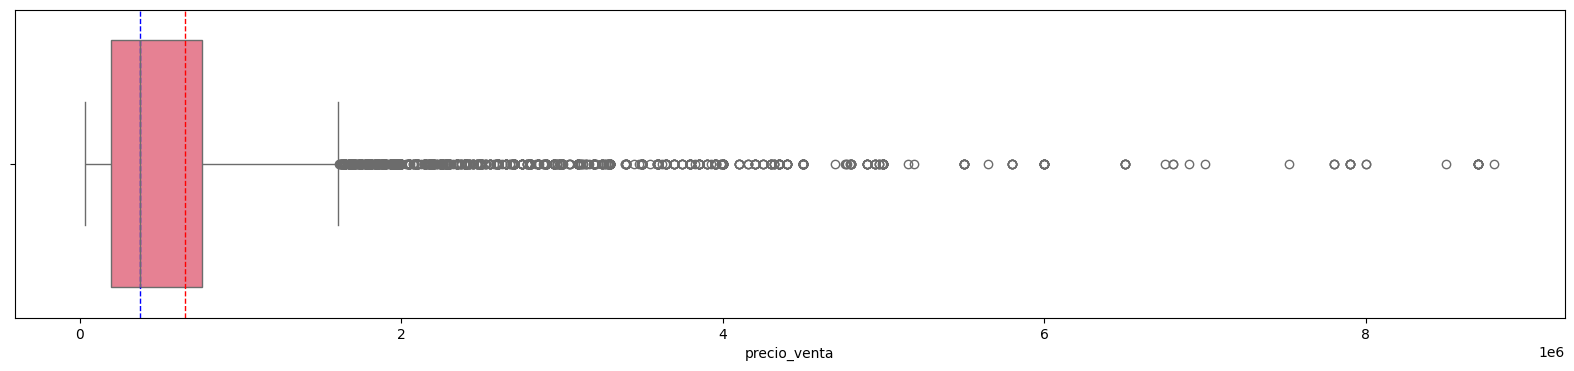

d:\Documentos\2.CURSOS\BOOTCAMP\privado\Proyecto_ML\src\notebooks\..\utils\funciones.py:81: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



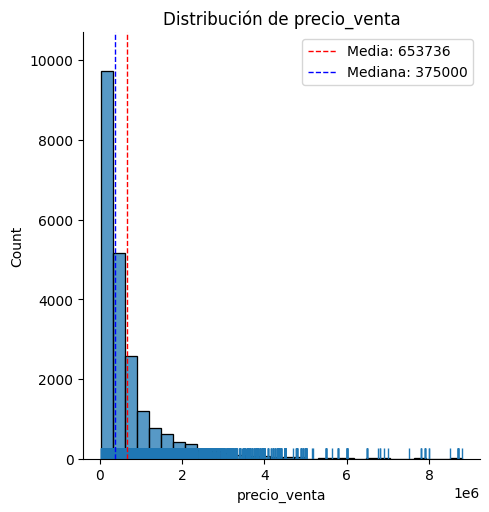

count      21742.0
mean      653736.0
std       782082.0
min        36000.0
25%       198000.0
50%       375000.0
75%       763600.0
max      8800000.0
Name: precio_venta, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: precio_venta_por_m2



d:\Documentos\2.CURSOS\BOOTCAMP\privado\Proyecto_ML\src\notebooks\..\utils\funciones.py:75: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




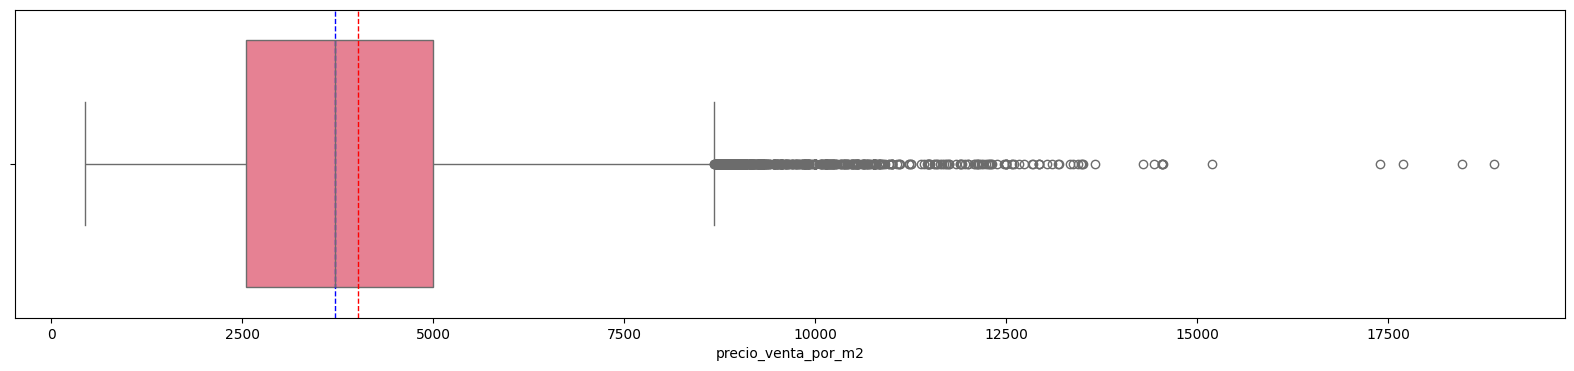

d:\Documentos\2.CURSOS\BOOTCAMP\privado\Proyecto_ML\src\notebooks\..\utils\funciones.py:81: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



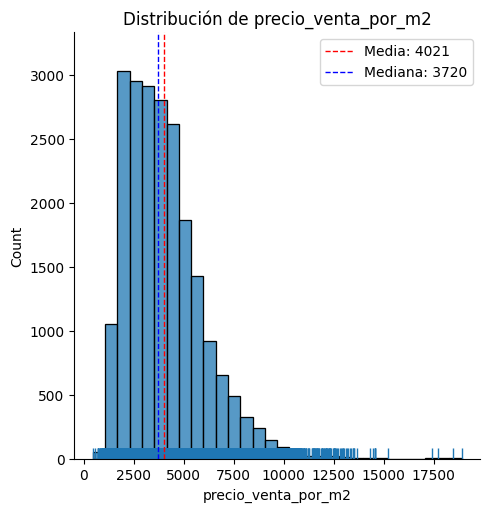

count    21742.0
mean      4021.0
std       1908.0
min        447.0
25%       2551.0
50%       3720.0
75%       5000.0
max      18889.0
Name: precio_venta_por_m2, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: bannos



d:\Documentos\2.CURSOS\BOOTCAMP\privado\Proyecto_ML\src\notebooks\..\utils\funciones.py:75: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




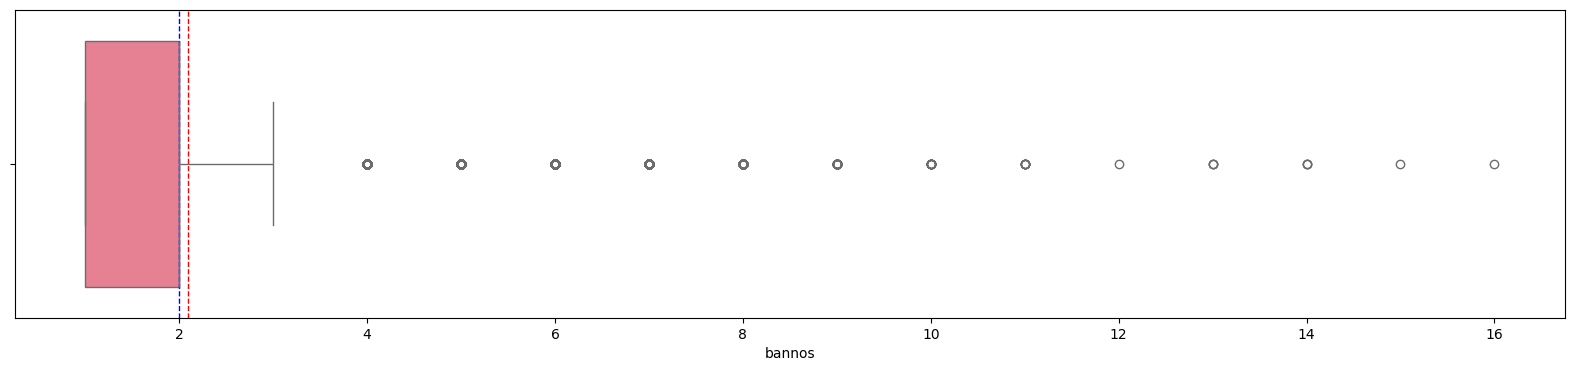

d:\Documentos\2.CURSOS\BOOTCAMP\privado\Proyecto_ML\src\notebooks\..\utils\funciones.py:81: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



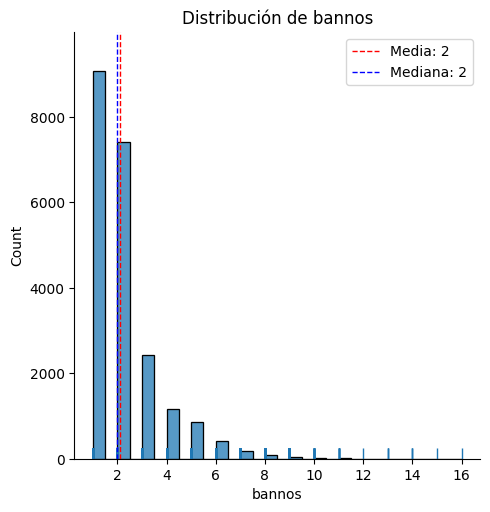

count    21726.0
mean         2.0
std          1.0
min          1.0
25%          1.0
50%          2.0
75%          2.0
max         16.0
Name: bannos, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: habitaciones



d:\Documentos\2.CURSOS\BOOTCAMP\privado\Proyecto_ML\src\notebooks\..\utils\funciones.py:75: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




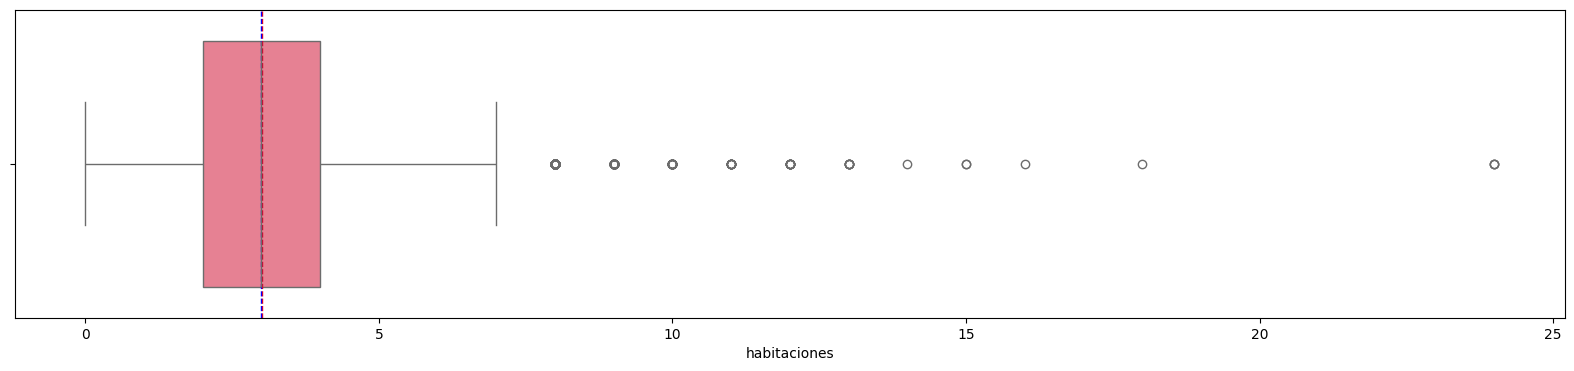

d:\Documentos\2.CURSOS\BOOTCAMP\privado\Proyecto_ML\src\notebooks\..\utils\funciones.py:81: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



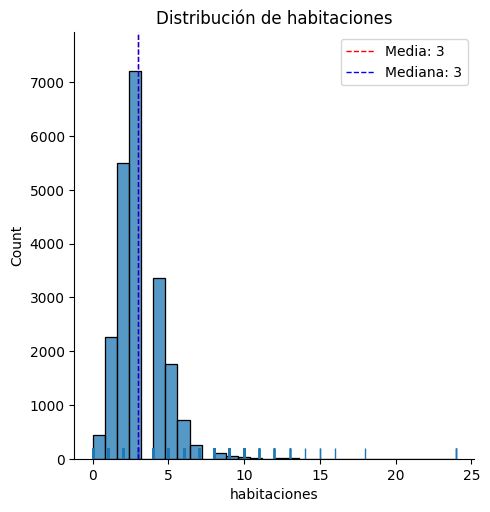

count    21742.0
mean         3.0
std          2.0
min          0.0
25%          2.0
50%          3.0
75%          4.0
max         24.0
Name: habitaciones, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: metros_cuadrados



d:\Documentos\2.CURSOS\BOOTCAMP\privado\Proyecto_ML\src\notebooks\..\utils\funciones.py:75: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




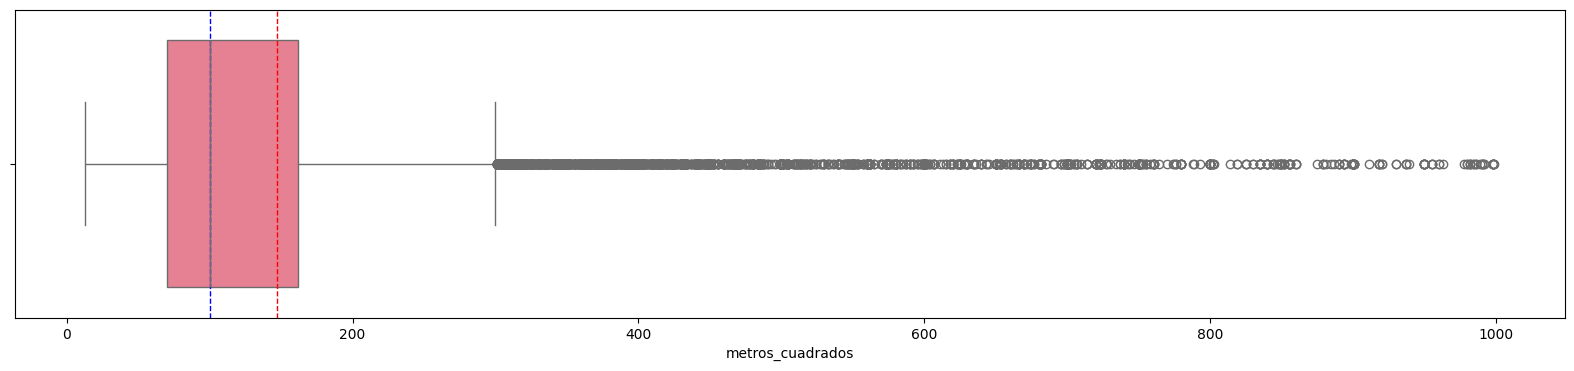

d:\Documentos\2.CURSOS\BOOTCAMP\privado\Proyecto_ML\src\notebooks\..\utils\funciones.py:81: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



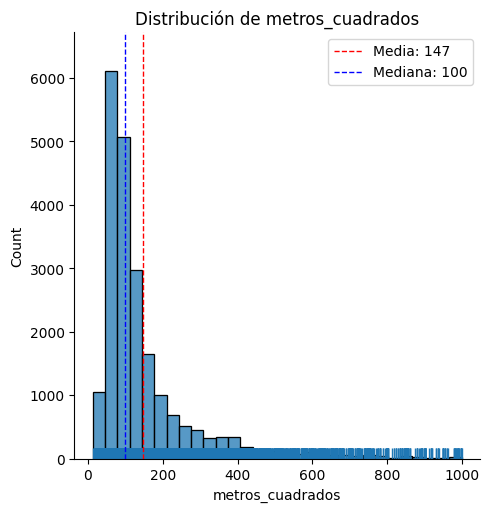

count    21616.0
mean       147.0
std        134.0
min         13.0
25%         70.0
50%        100.0
75%        162.0
max        999.0
Name: metros_cuadrados, dtype: float64
------------------------------------------------------------


In [84]:
f.graficos_variables_cuant(df_cuant)

##### Variables Cualitativas

In [85]:
df_cual = df.select_dtypes(exclude= 'number')

----------------------------------------------------------------------------------------------------
VARIABLE: cee



d:\Documentos\2.CURSOS\BOOTCAMP\privado\Proyecto_ML\src\notebooks\..\utils\funciones.py:102: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


d:\Documentos\2.CURSOS\BOOTCAMP\privado\Proyecto_ML\src\notebooks\..\utils\funciones.py:103: UserWarning:

FixedFormatter should only be used together with FixedLocator



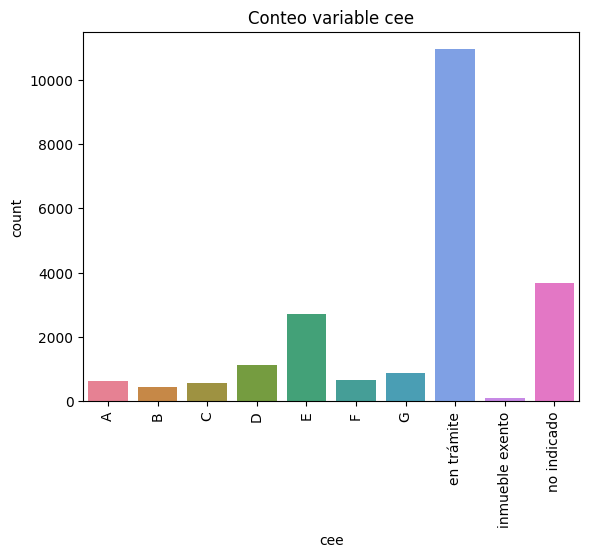

cee
en trámite         10937
no indicado         3669
E                   2701
D                   1121
G                    894
F                    674
A                    618
C                    580
B                    452
inmueble exento       96
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: piso



d:\Documentos\2.CURSOS\BOOTCAMP\privado\Proyecto_ML\src\notebooks\..\utils\funciones.py:102: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


d:\Documentos\2.CURSOS\BOOTCAMP\privado\Proyecto_ML\src\notebooks\..\utils\funciones.py:103: UserWarning:

FixedFormatter should only be used together with FixedLocator



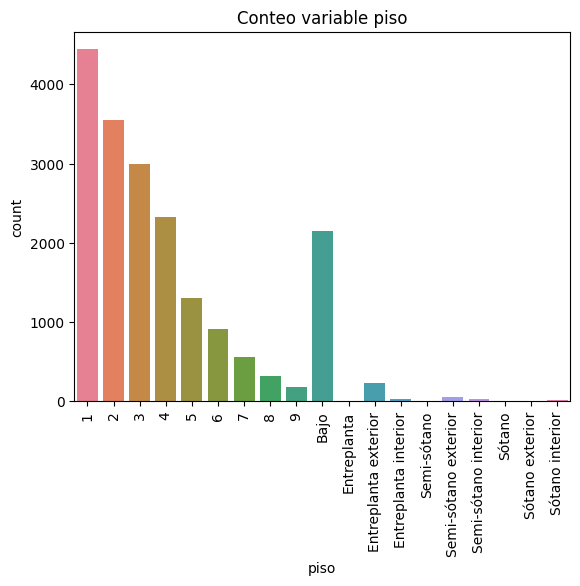

piso
1                       4440
2                       3546
3                       3001
4                       2323
Bajo                    2144
5                       1310
6                        913
7                        556
8                        326
Entreplanta exterior     236
9                        181
Semi-sótano exterior      55
Semi-sótano interior      36
Entreplanta interior      32
Sótano interior           23
Sótano                     5
Sótano exterior            4
Entreplanta                3
Semi-sótano                1
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: balcon

No es necesario graficar porque tiene un solo valor dentro de la columna
balcon
True    3321
Name: count, dtype: int64
-------------------------------------------------------------------------------

d:\Documentos\2.CURSOS\BOOTCAMP\privado\Proyecto_ML\src\notebooks\..\utils\funciones.py:102: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


d:\Documentos\2.CURSOS\BOOTCAMP\privado\Proyecto_ML\src\notebooks\..\utils\funciones.py:103: UserWarning:

FixedFormatter should only be used together with FixedLocator



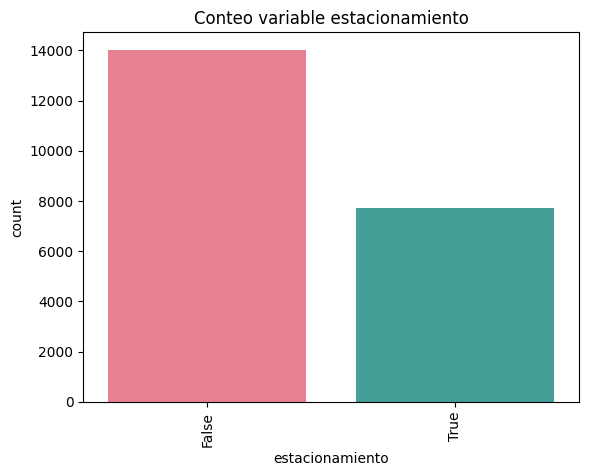

estacionamiento
False    14023
True      7719
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: pileta

No es necesario graficar porque tiene un solo valor dentro de la columna
pileta
True    5171
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: trastero

No es necesario graficar porque tiene un solo valor dentro de la columna
trastero
True    7698
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: terraza

No es necesario graficar 

d:\Documentos\2.CURSOS\BOOTCAMP\privado\Proyecto_ML\src\notebooks\..\utils\funciones.py:102: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


d:\Documentos\2.CURSOS\BOOTCAMP\privado\Proyecto_ML\src\notebooks\..\utils\funciones.py:103: UserWarning:

FixedFormatter should only be used together with FixedLocator



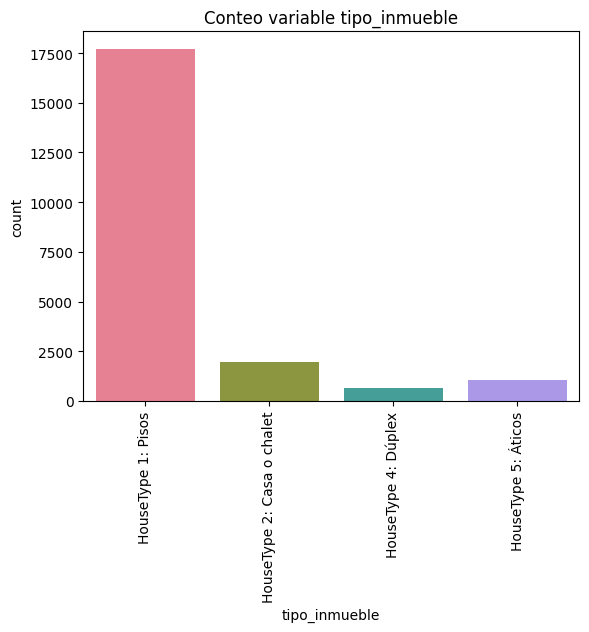

tipo_inmueble
HouseType 1: Pisos            17705
HouseType 2: Casa o chalet     1938
HouseType 5: Áticos            1032
HouseType 4: Dúplex             676
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: accesible

No es necesario graficar porque tiene un solo valor dentro de la columna
accesible
True    4074
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: exterior



d:\Documentos\2.CURSOS\BOOTCAMP\privado\Proyecto_ML\src\notebooks\..\utils\funciones.py:102: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


d:\Documentos\2.CURSOS\BOOTCAMP\privado\Proyecto_ML\src\notebooks\..\utils\funciones.py:103: UserWarning:

FixedFormatter should only be used together with FixedLocator



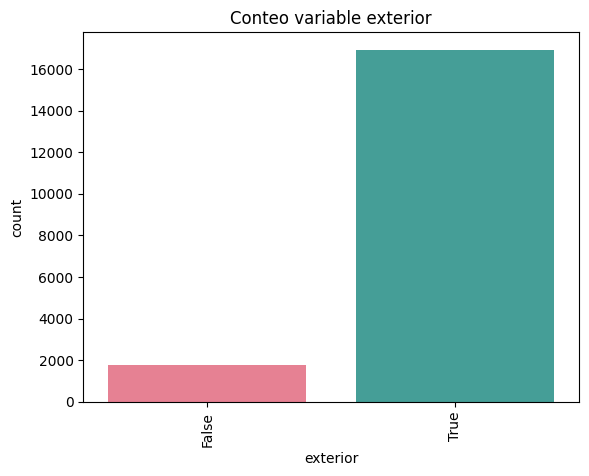

exterior
True     16922
False     1777
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: bajo



d:\Documentos\2.CURSOS\BOOTCAMP\privado\Proyecto_ML\src\notebooks\..\utils\funciones.py:102: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


d:\Documentos\2.CURSOS\BOOTCAMP\privado\Proyecto_ML\src\notebooks\..\utils\funciones.py:103: UserWarning:

FixedFormatter should only be used together with FixedLocator



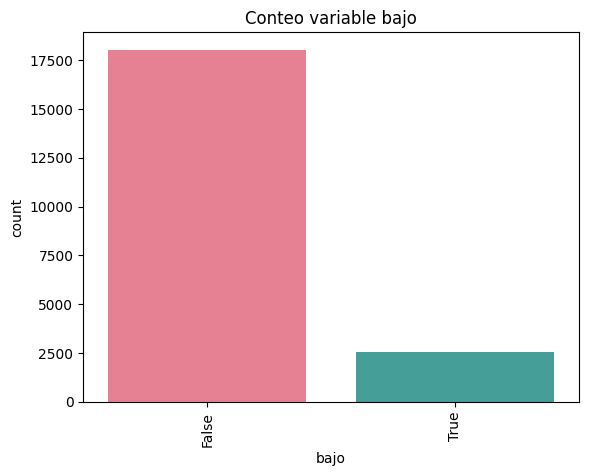

bajo
False    18033
True      2539
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: necesita_reforma



d:\Documentos\2.CURSOS\BOOTCAMP\privado\Proyecto_ML\src\notebooks\..\utils\funciones.py:102: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


d:\Documentos\2.CURSOS\BOOTCAMP\privado\Proyecto_ML\src\notebooks\..\utils\funciones.py:103: UserWarning:

FixedFormatter should only be used together with FixedLocator



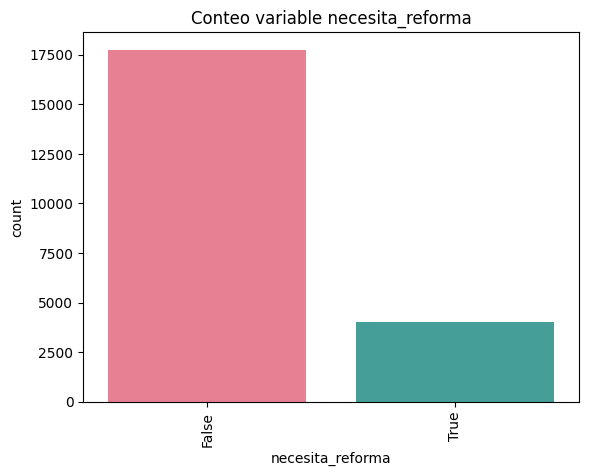

necesita_reforma
False    17747
True      3995
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: ubicacion



d:\Documentos\2.CURSOS\BOOTCAMP\privado\Proyecto_ML\src\notebooks\..\utils\funciones.py:102: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


d:\Documentos\2.CURSOS\BOOTCAMP\privado\Proyecto_ML\src\notebooks\..\utils\funciones.py:103: UserWarning:

FixedFormatter should only be used together with FixedLocator



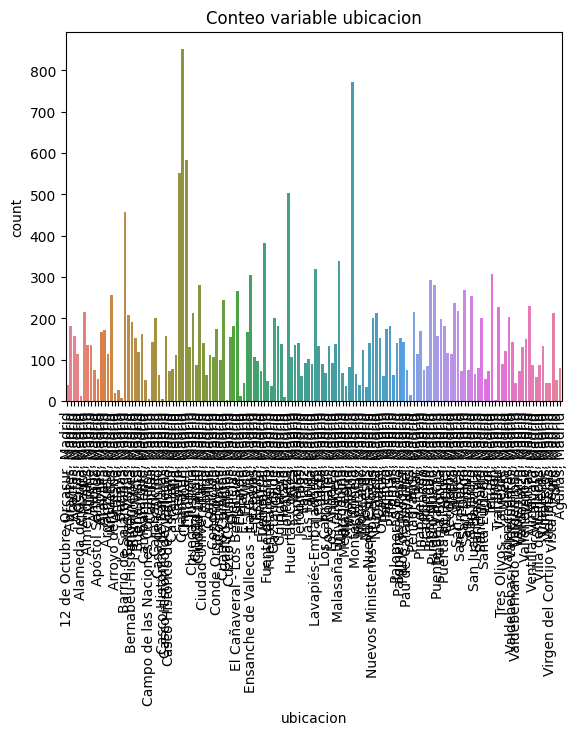

ubicacion
Chamartín, Madrid                           851
Moncloa, Madrid                             771
Chamberí, Madrid                            583
Centro, Madrid                              552
Hortaleza, Madrid                           503
                                           ... 
Barajas, Madrid                               7
Campo de las Naciones-Corralejos, Madrid      6
Casco Histórico de Barajas, Madrid            5
Timón, Madrid                                 4
Cuatro Vientos, Madrid                        2
Name: count, Length: 146, dtype: int64
----------------------------------------------------------------------------------------------------


In [86]:
f.graficos_variables_cualit(df_cual)

## Limpieza de datos

##### Rellenado columnas que tienen solo un valor
Asumimos que las columnas binarias que solo tienen un valor sus faltantes son el opuesto [True - False]

In [87]:
df = f.rellenar_columnas_F(df) 

##### Rellenado de datos en base a medias o como consecuencia de otras columnas

In [13]:
df = f.rellenar_annios_nulos_necesitan_reforma(df)
df = f.rellenar_annios_nulos_no_necesitan_reforma(df)
df = f.rellenar_annio_outlier(df)
df = f.rellenar_pisos_nulos(df)
df = f.rellenar_bajos_nulos(df)
df = f.sacar_metros_cuadrados_nuevos(df)
df = f.rellenar_exterior(df)
df = f.rellenar_tipo_inmueble(df)
df = f.rellenar_bannos_nulos(df)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   precio_venta         21742 non-null  int64  
 1   precio_venta_por_m2  21742 non-null  int64  
 2   cee                  21742 non-null  object 
 3   balcon               21742 non-null  bool   
 4   armarios_empotrados  21742 non-null  bool   
 5   jardin               21742 non-null  bool   
 6   zonas_verdes         21742 non-null  bool   
 7   estacionamiento      21742 non-null  bool   
 8   pileta               21742 non-null  bool   
 9   trastero             21742 non-null  bool   
 10  terraza              21742 non-null  bool   
 11  tipo_inmueble        21742 non-null  object 
 12  accesible            21742 non-null  bool   
 13  exterior             21742 non-null  bool   
 14  bajo                 21742 non-null  bool   
 15  necesita_reforma     21742 non-null 

##### Feature engineering: Se agregan datos para analizar de mejor manera

In [20]:
'''ya guardé un csv con el dataframe ejecutado pero el utils esta la función con la que obtuve esa información'''
df_coordenadas = pd.read_csv(r'..\data\raw\df_coordenadas.csv', index_col= 'Unnamed: 0')

In [21]:
df = pd.merge(df,df_coordenadas, on= 'ubicacion')

In [24]:
df = f.zonas_nuevo(df)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   precio_venta         21742 non-null  int64  
 1   precio_venta_por_m2  21742 non-null  int64  
 2   cee                  21742 non-null  object 
 3   balcon               21742 non-null  bool   
 4   armarios_empotrados  21742 non-null  bool   
 5   jardin               21742 non-null  bool   
 6   zonas_verdes         21742 non-null  bool   
 7   estacionamiento      21742 non-null  bool   
 8   pileta               21742 non-null  bool   
 9   trastero             21742 non-null  bool   
 10  terraza              21742 non-null  bool   
 11  tipo_inmueble        21742 non-null  object 
 12  accesible            21742 non-null  bool   
 13  exterior             21742 non-null  bool   
 14  bajo                 21742 non-null  bool   
 15  necesita_reforma     21742 non-null 

#### Analisis de la variable principal

d:\Documentos\2.CURSOS\BOOTCAMP\privado\Proyecto_ML\src\notebooks\..\utils\funciones_EDA.py:370: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=data, x='precio_venta_por_m2',fill=True,palette='hls')


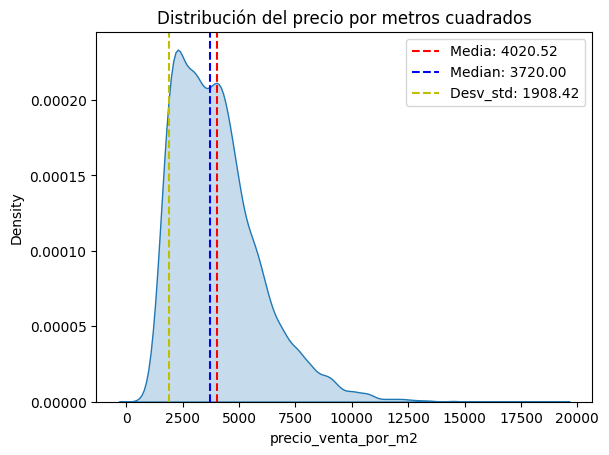

kurtosis: 2.15
simetria: 1.17
La distribución es leptocúrtica, lo que sugiere colas pesadas y picos agudos.
La distribución es asimétrica negativa (sesgo hacia la izquierda).


In [26]:
f.grafico_variable_ppal(df)

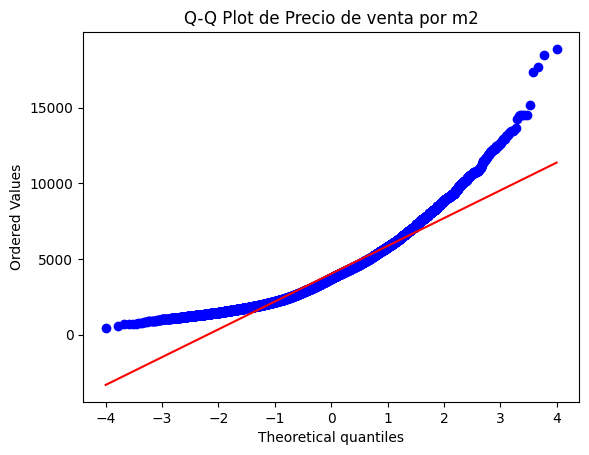

In [27]:
f.prueba_grafica_normalidad(df)

In [28]:
f.prueba_normalidad_shapiro(df)

Estadística de prueba: 0.9275674819946289
Valor p: 0.0
Rechazamos la hipótesis nula; los datos no siguen una distribución normal.


c:\Users\Mega Tecnologia\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


##### Pair plo para ver como están relacionadas las variables numéricas del DataFrame

c:\Users\Mega Tecnologia\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Mega Tecnologia\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Mega Tecnologia\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Mega Tecnologia\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Mega Tecnologia\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignori

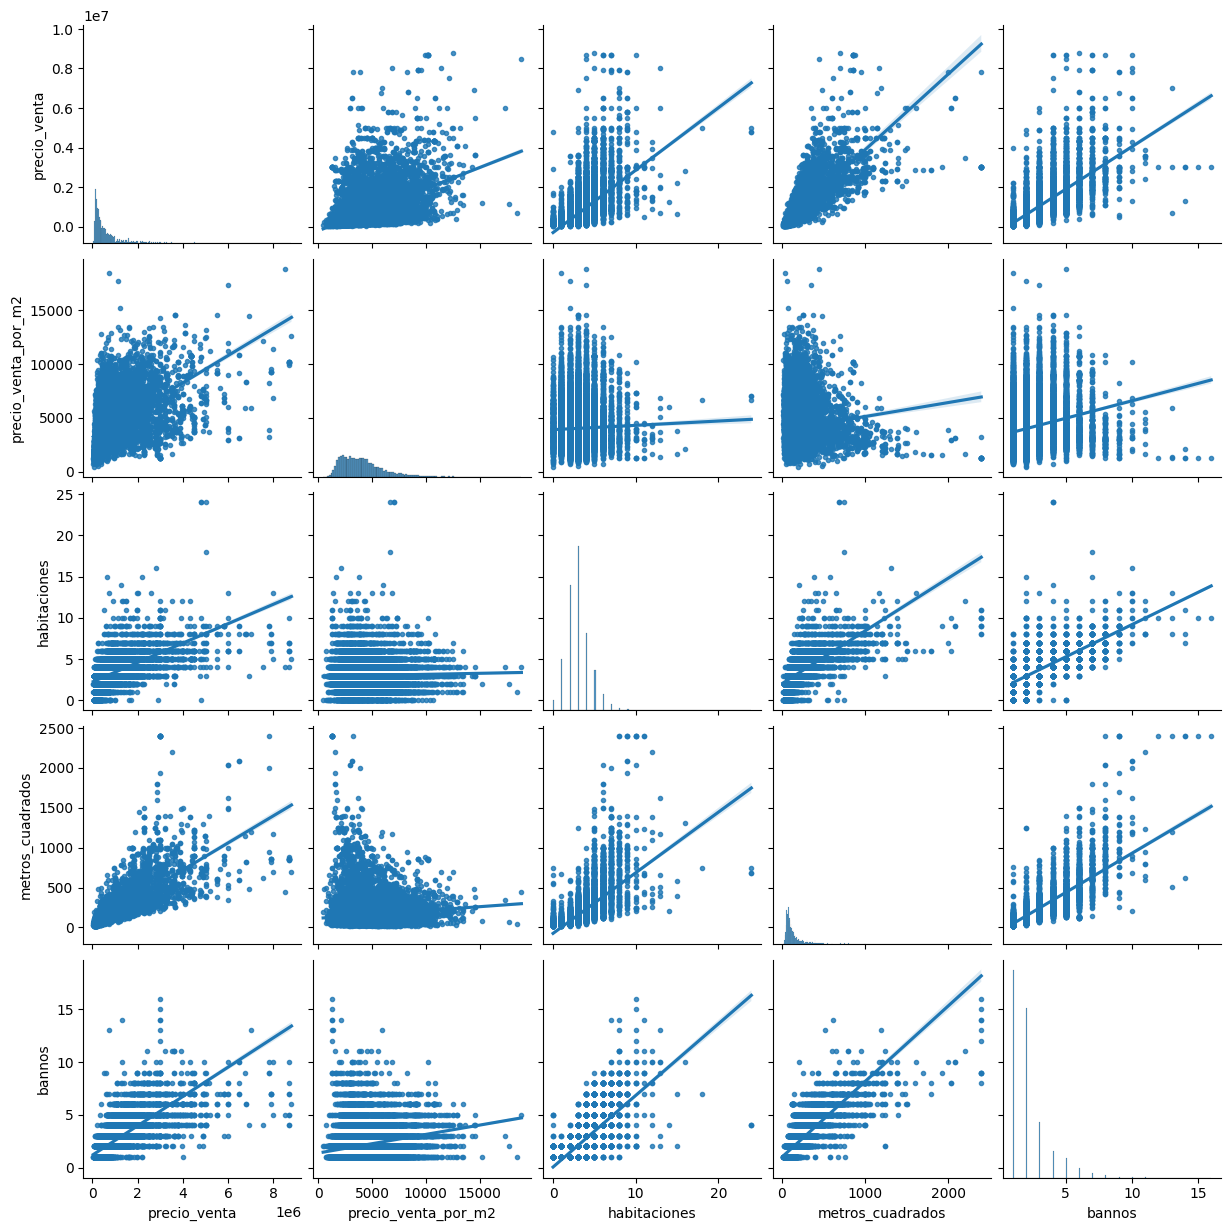

In [29]:
f.pair_plot(df)

In [30]:
df.corr(numeric_only=True)

precio_venta  precio_venta_por_m2    balcon  \
precio_venta             1.000000             0.519645  0.111260   
precio_venta_por_m2      0.519645             1.000000  0.117304   
balcon                   0.111260             0.117304  1.000000   
armarios_empotrados      0.107160             0.119766  0.137072   
jardin                   0.447871            -0.033011  0.048274   
zonas_verdes            -0.033806            -0.013399 -0.026152   
estacionamiento          0.330515             0.104458 -0.009096   
pileta                   0.245192             0.039205 -0.045900   
trastero                 0.262311             0.094452  0.043888   
terraza                  0.120923            -0.100564  0.011485   
accesible               -0.028822             0.019470  0.045776   
exterior                 0.281462            -0.046548 -0.016431   
bajo                     0.250835            -0.008258 -0.024615   
necesita_reforma         0.044302            -0.036818  0.008181   
habitaciones             0.608893             0.031707  0.088361   
annio_construccion      -0.025967            -0.313398 -0.166658   
metros_cuadrados         0.804609             0.112110  0.072604   
bannos                   0.771973             0.238746  0.084780   
latitud                  0.315245             0.379532  0.028965   
longitud                -0.027074            -0.046499 -0.058764   

                     armarios_empotrados    jardin  zonas_verdes  \
precio_venta                    0.107160  0.447871     -0.033806   
precio_venta_por_m2             0.119766 -0.033011     -0.013399   
balcon                          0.137072  0.048274     -0.026152   
armarios_empotrados             1.000000  0.059104      0.180812   
jardin                          0.059104  1.000000     -0.132978   
zonas_verdes                    0.180812 -0.132978      1.000000   
estacionamiento                 0.212277  0.276892      0.361351   
pileta                          0.117794  0.331471      0.492217   
trastero                        0.187674  0.158601      0.276137   
terraza                         0.100021  0.159160      0.108325   
accesible                       0.209976 -0.085765      0.205973   
exterior                       -0.034991  0.523460     -0.101976   
bajo                           -0.054906  0.465945     -0.102731   
necesita_reforma               -0.117472 -0.016544     -0.095554   
habitaciones                    0.081588  0.457406     -0.008779   
annio_construccion              0.092722  0.195178      0.312555   
metros_cuadrados                0.088108  0.624207     -0.032351   
bannos                          0.145836  0.584420      0.029219   
latitud                         0.121980  0.190358      0.085091   
longitud                       -0.011556 -0.016427      0.104394   

                     estacionamiento    pileta  trastero   terraza  accesible  \
precio_venta                0.330515  0.245192  0.262311  0.120923  -0.028822   
precio_venta_por_m2         0.104458  0.039205  0.094452 -0.100564   0.019470   
balcon                     -0.009096 -0.045900  0.043888  0.011485   0.045776   
armarios_empotrados         0.212277  0.117794  0.187674  0.100021   0.209976   
jardin                      0.276892  0.331471  0.158601  0.159160  -0.085765   
zonas_verdes                0.361351  0.492217  0.276137  0.108325   0.205973   
estacionamiento             1.000000  0.532139  0.471914  0.187708   0.116168   
pileta                      0.532139  1.000000  0.398736  0.170473   0.071443   
trastero                    0.471914  0.398736  1.000000  0.158022   0.080239   
terraza                     0.187708  0.170473  0.158022  1.000000   0.051990   
accesible                   0.116168  0.071443  0.080239  0.051990   1.000000   
exterior                    0.133204  0.155082  0.068985  0.061937  -0.070403   
bajo                        0.108715  0.135564  0.068602  0.059550  -0.082463   
necesita_reforma           -0

## Análisis Bivariante

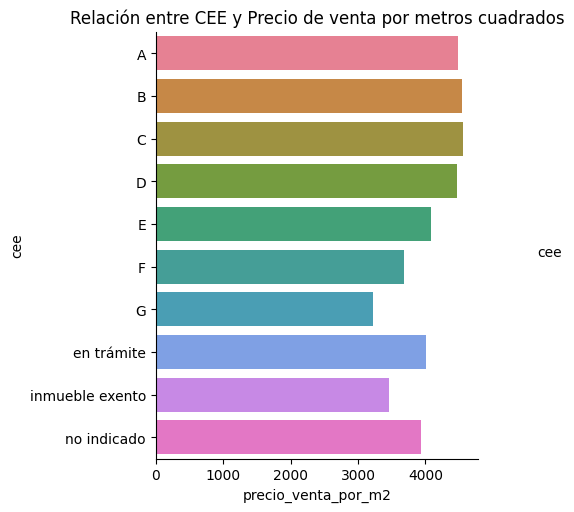

In [31]:
f.precio_cee(df)

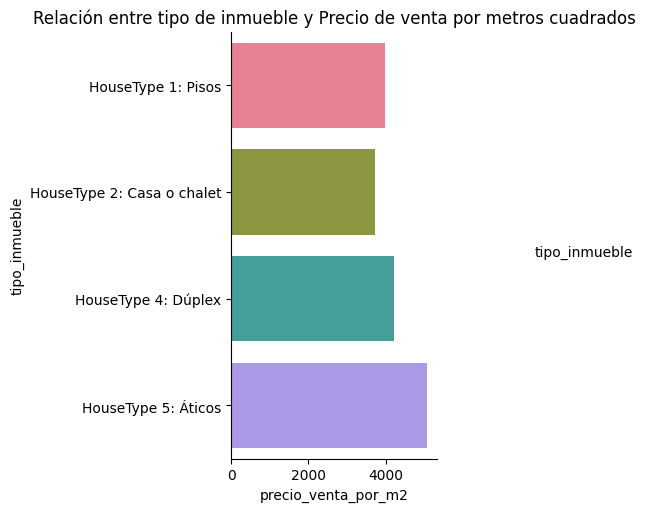

In [32]:
f.precio_tipo_inmueble(df)

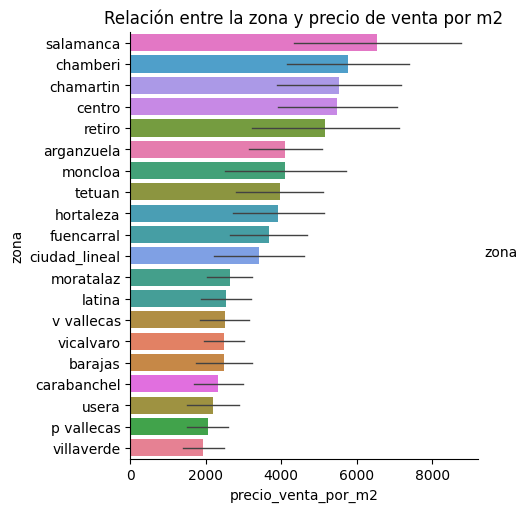

In [33]:
f.grafico_precio_zona(df)

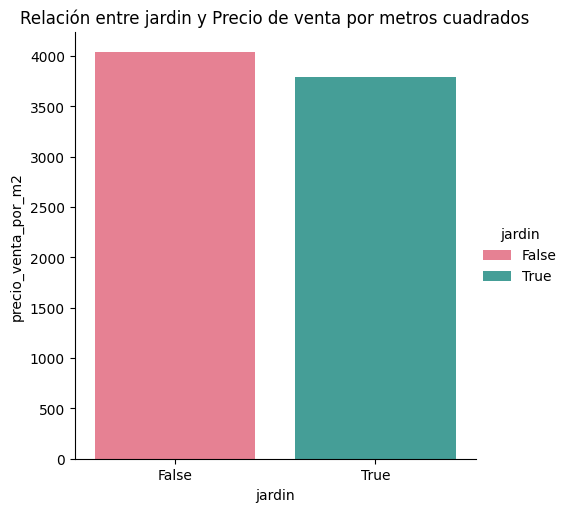

In [34]:
f.grafico_precio_var1(df, 'jardin')

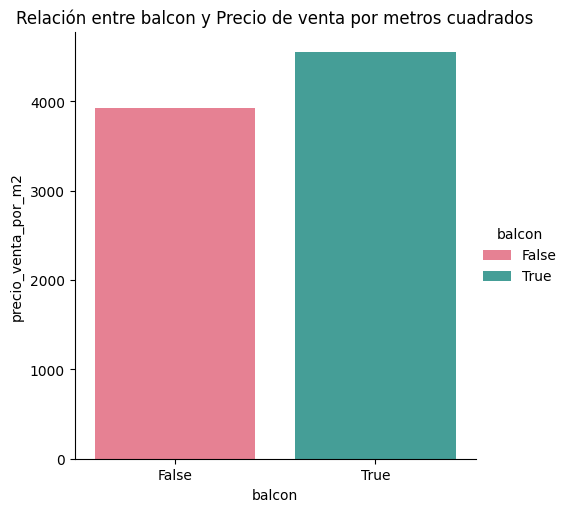

In [35]:
f.grafico_precio_var1(df, 'balcon')

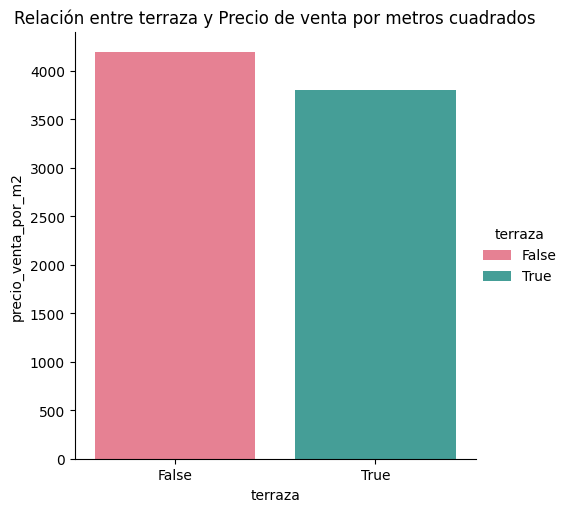

In [36]:
f.grafico_precio_var1(df, 'terraza')

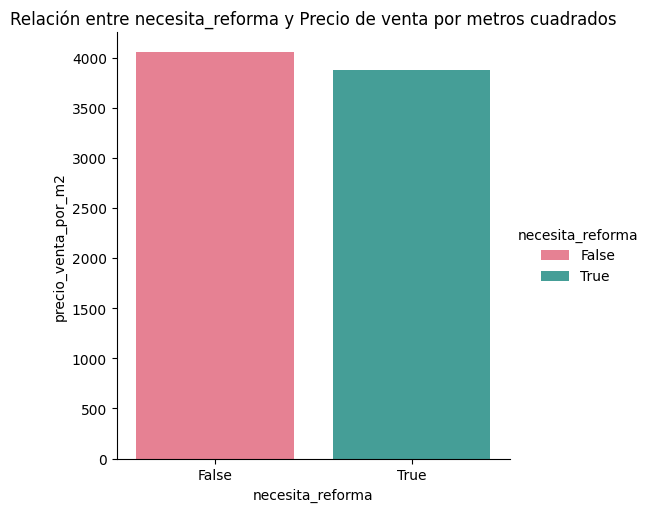

In [37]:
f.grafico_precio_var1(df, 'necesita_reforma')

C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_488\1209891207.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data= df.sort_values(by='zona'), x= 'zona', palette='husl')
C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_488\1209891207.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df['zona'].sort_values().unique(), rotation=90)


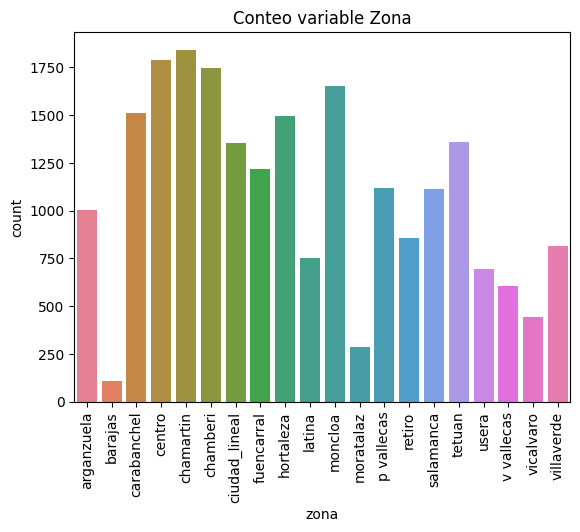

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(data= df.sort_values(by='zona'), x= 'zona', palette='husl')
ax.set_xticklabels(df['zona'].sort_values().unique(), rotation=90)
#se superponen los valores porque me da uns advertencia al aplicar este parametro, no sé como sacarla :)
plt.title(f"Conteo variable Zona")
plt.show();

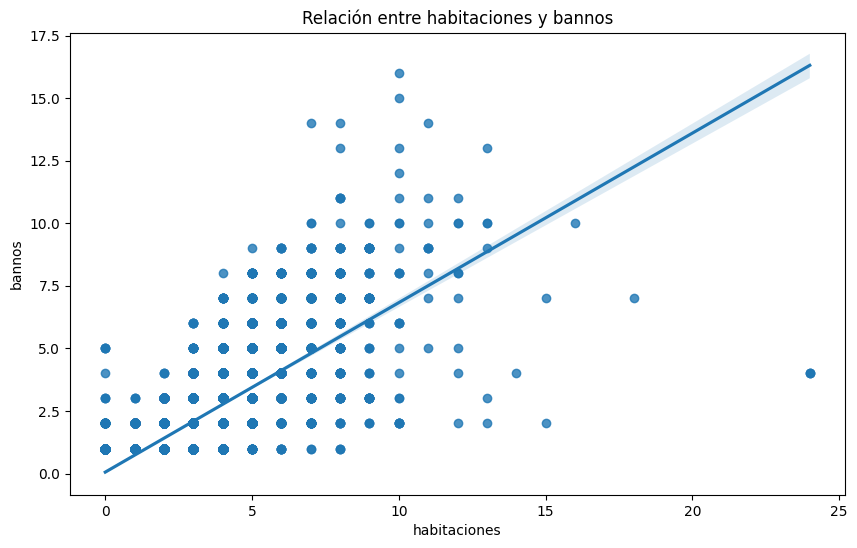

In [42]:
f.grafico_var1_var2(df, 'habitaciones', 'bannos') 

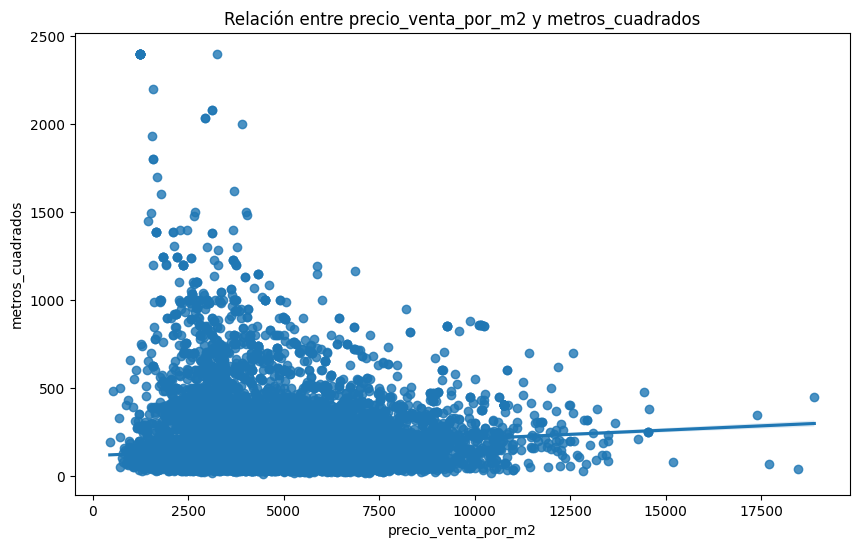

In [43]:
f.grafico_var1_var2(df, 'precio_venta_por_m2', 'metros_cuadrados')

#### Análisis Multivariante

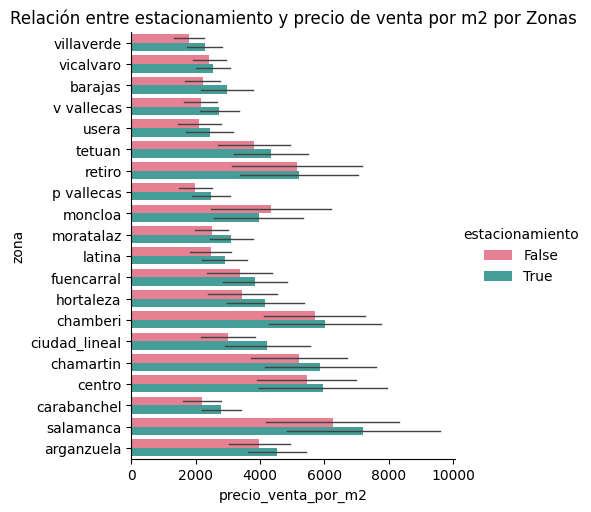

In [44]:
f.grafico_precio_zona_yvariable(df, 'estacionamiento')

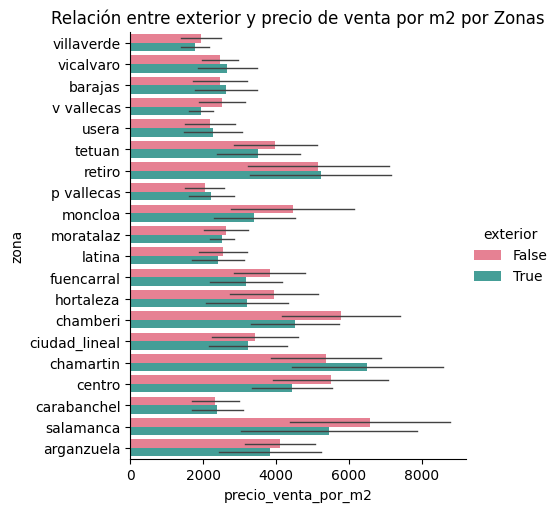

In [45]:
f.grafico_precio_zona_yvariable(df,'exterior')

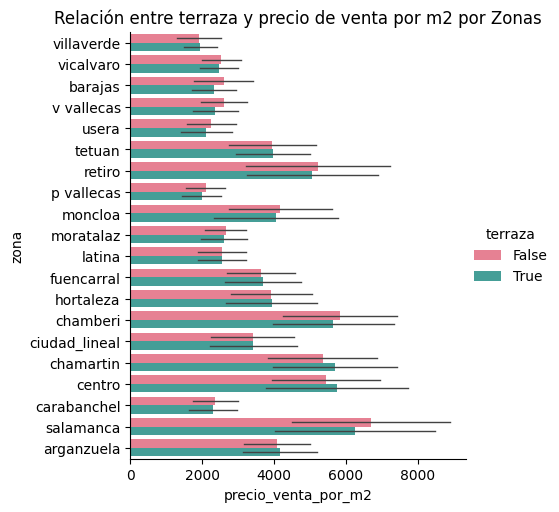

In [46]:
f.grafico_precio_zona_yvariable(df, 'terraza')

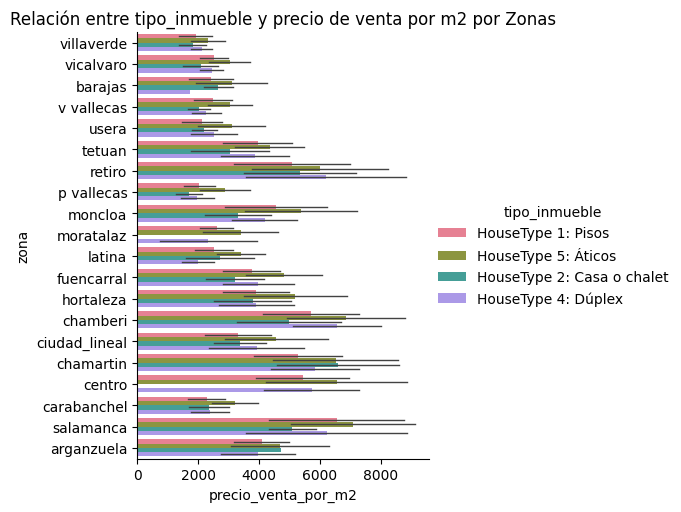

In [47]:
f.grafico_precio_zona_yvariable(df,'tipo_inmueble')

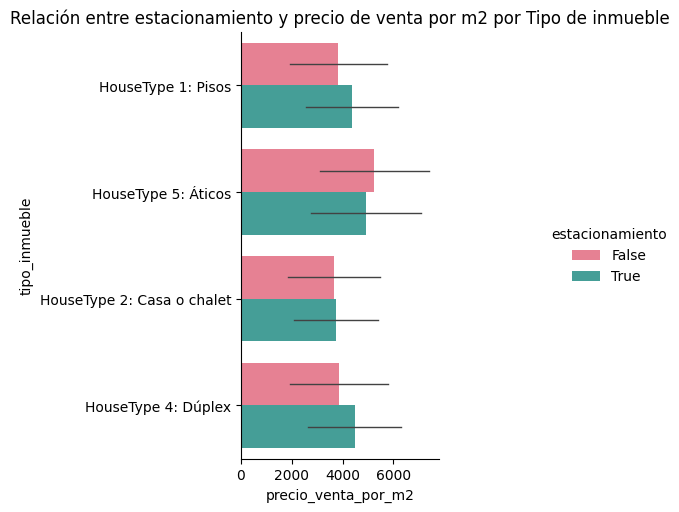

In [48]:
f.grafico_precio_tipo_inmueble_yvariable(df, 'estacionamiento')

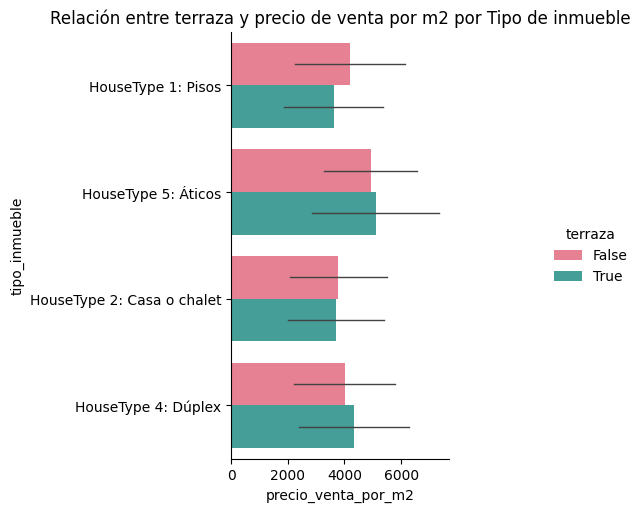

In [49]:
f.grafico_precio_tipo_inmueble_yvariable(df, 'terraza')

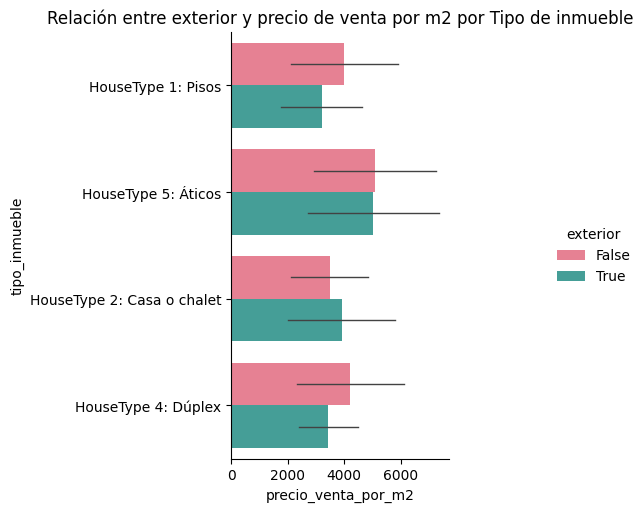

In [50]:
f.grafico_precio_tipo_inmueble_yvariable(df,'exterior')

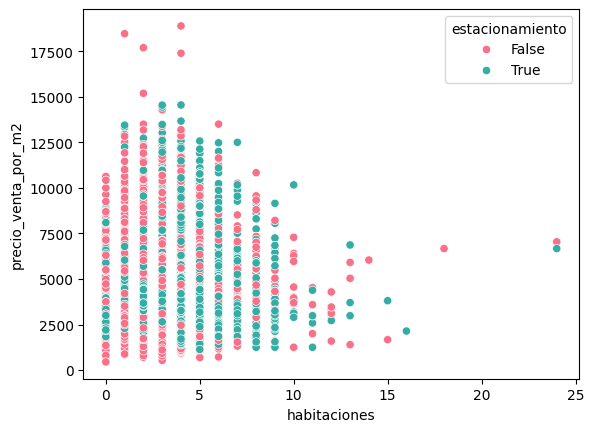

In [51]:
f.grafico_precio_var1_var2(df, 'habitaciones', 'estacionamiento')

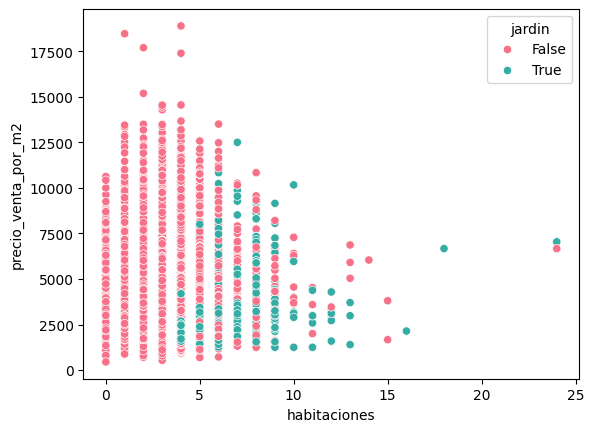

In [52]:
f.grafico_precio_var1_var2(df, 'habitaciones', 'jardin')

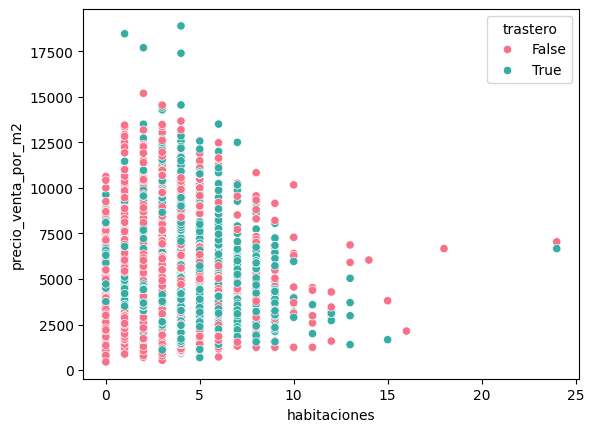

In [53]:
f.grafico_precio_var1_var2(df, 'habitaciones', 'trastero')

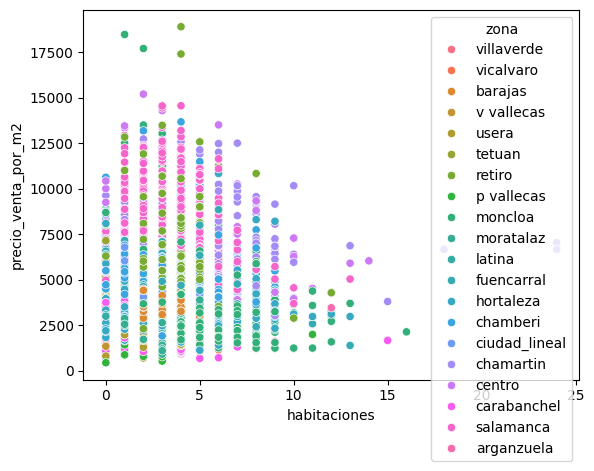

In [54]:
f.grafico_precio_var1_var2(df, 'habitaciones', 'zona')

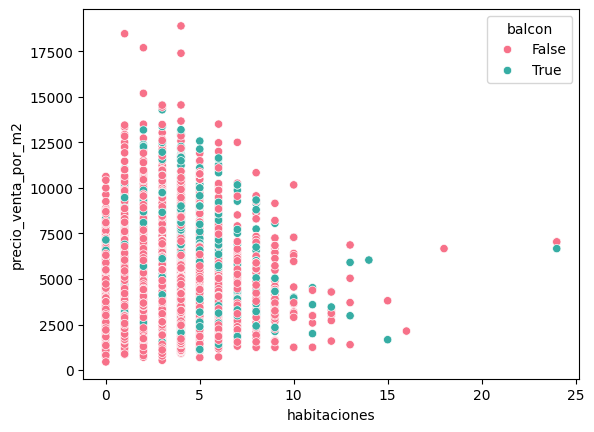

In [55]:
f.grafico_precio_var1_var2(df, 'habitaciones', 'balcon')

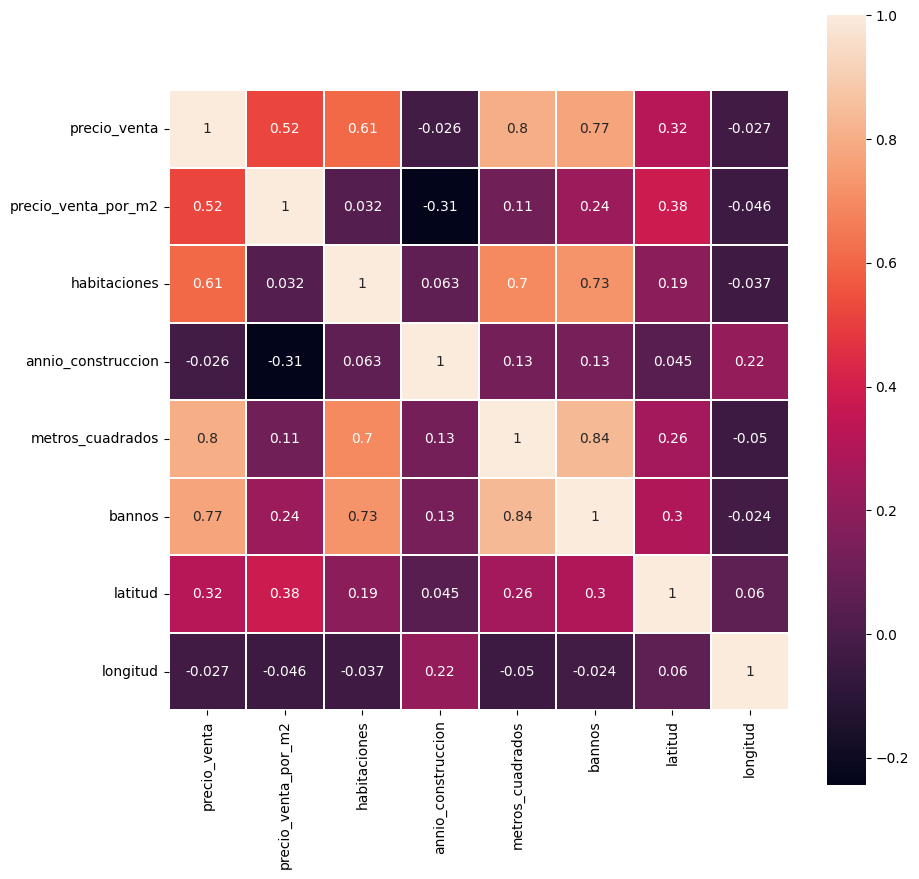

In [57]:
f.grafico_heatmap(df)

Transformamos las columnas booleanas del data frame a 1 y ceros para poder analizar la correlación completa entre las variables

In [58]:
df_num = f.tranformacion_numerica(df)

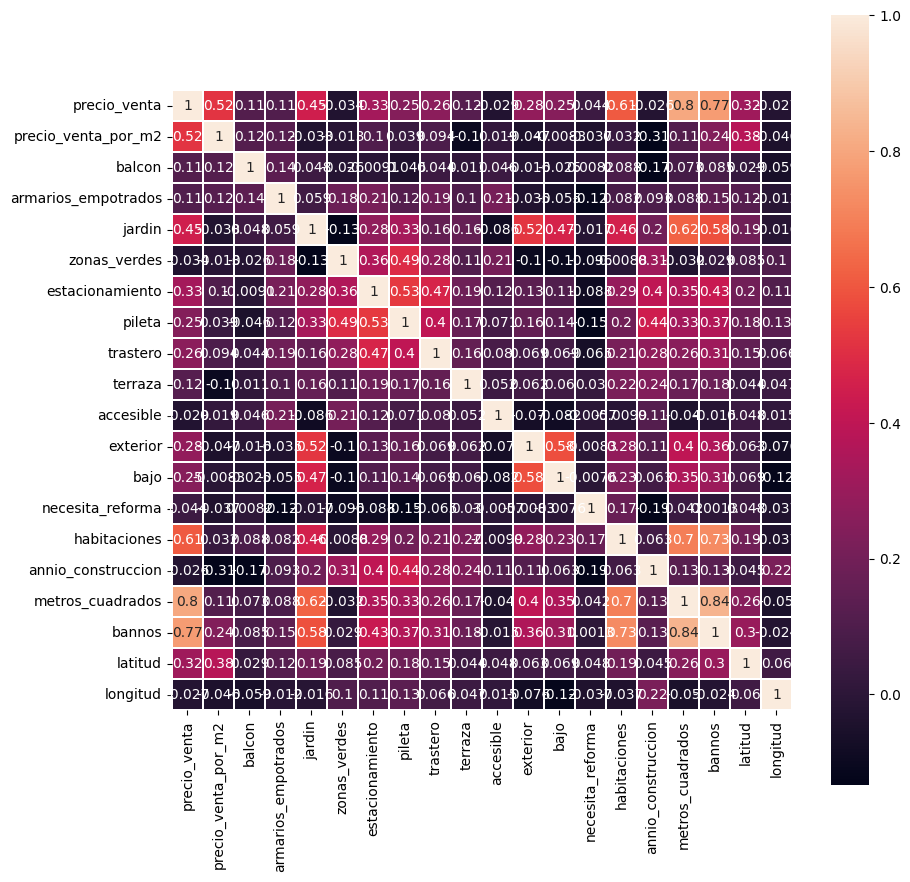

In [59]:
f.grafico_heatmap(df_num)

#### Comprobaciones estadísticas

In [62]:
f.prueba_corr_spearman(df, 'precio_venta_por_m2', 'habitaciones')

Coeficiente de correlación de Spearman: 0.0280159527070686
Valor p: 0.0
Hay evidencia para rechazar la hipótesis nula; existe una correlación significativa.


In [63]:
f.prueba_corr_spearman(df, 'precio_venta_por_m2', 'bannos')

Coeficiente de correlación de Spearman: 0.32263404699920534
Valor p: 0.0
Hay evidencia para rechazar la hipótesis nula; existe una correlación significativa.


In [64]:
f.prueba_corr_spearman(df, 'precio_venta_por_m2', 'metros_cuadrados')

Coeficiente de correlación de Spearman: 0.24433842937968334
Valor p: 0.0
Hay evidencia para rechazar la hipótesis nula; existe una correlación significativa.


In [65]:
f.prueba_corr_spearman(df, 'precio_venta_por_m2', 'annio_construccion')

Coeficiente de correlación de Spearman: -0.29060999801162873
Valor p: 0.0
Hay evidencia para rechazar la hipótesis nula; existe una correlación significativa.


In [66]:
f.prueba_corr_spearman(df_num, 'precio_venta_por_m2', 'trastero')

Coeficiente de correlación de Spearman: 0.11082041274104672
Valor p: 0.0
Hay evidencia para rechazar la hipótesis nula; existe una correlación significativa.


In [67]:
f.prueba_corr_spearman(df_num, 'precio_venta_por_m2', 'balcon')     

Coeficiente de correlación de Spearman: 0.1161740021531982
Valor p: 0.0
Hay evidencia para rechazar la hipótesis nula; existe una correlación significativa.


In [68]:
f.prueba_krus_cee(df)


Prueba de Kruskal-Wallis para más de dos muestras independientes: stat = 420.83235061821665, p_value = 4.8955146852860465e-85
Rechazamos la hipótesis nula. Hay evidencia de al menos una diferencia significativa en la de precios por m2 entre las letras de los certificados


In [69]:
f.prueba_krus_zonas(df)


Prueba de Kruskal-Wallis para más de dos muestras independientes: stat = nan, p_value = nan
No hay suficiente evidencia para rechazar la hipótesis nula. No hay diferencia significativa en en el precio por m2 entre las zonas.


In [70]:
f.grafico_mapa(df, 't')

In [71]:
f.grafico_mapa(df, 'z')

En conclusión

- Podemos ver que la letra del certificado energetico afecta directamente al precio por m2 del inmueble.
- La zona en donde se encuentra es un gran factor
- Los áticos son las viviendas con mayor precio
- La zonas más caras para comprar una vivienda son chamartin, centro, chamberi, moncloa, carabanchel.

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   precio_venta         21742 non-null  int64  
 1   precio_venta_por_m2  21742 non-null  int64  
 2   cee                  21742 non-null  object 
 3   balcon               21742 non-null  bool   
 4   armarios_empotrados  21742 non-null  bool   
 5   jardin               21742 non-null  bool   
 6   zonas_verdes         21742 non-null  bool   
 7   estacionamiento      21742 non-null  bool   
 8   pileta               21742 non-null  bool   
 9   trastero             21742 non-null  bool   
 10  terraza              21742 non-null  bool   
 11  tipo_inmueble        21742 non-null  object 
 12  accesible            21742 non-null  bool   
 13  exterior             21742 non-null  bool   
 14  bajo                 21742 non-null  bool   
 15  necesita_reforma     21742 non-null 

In [74]:
df.to_csv(r'..\data\processed\df_limpio.csv')